In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

%matplotlib inline

# workdirectory = '/home/jazhiel/ML_Notebooks/Cosmology_ML/'
workdirectory = ''

In [2]:
model = tf.keras.models.load_model('ANN_halo_binary_clasif.h5')

In [3]:
data_dict = np.load(workdirectory + 'OUTFILE1M.npz') #np.load('/path/to/nbody/outfile.npz')
test_flags  = data_dict['test_flags'] ## not important
test_hosts  = data_dict['test_hosts'] ### somewhat relevant
test_mass   = data_dict['test_mass'] ## important
test_labels = data_dict['test_labels'] ## important
test_input  = data_dict['test_input']

dr1 = pd.DataFrame(test_input[0], columns = ['dr1'])
dr2 = pd.DataFrame(test_input[1], columns = ['dr2'])
dr3 = pd.DataFrame(test_input[2], columns = ['dr3'])
dr4 = pd.DataFrame(test_input[3], columns = ['dr4'])
dr5 = pd.DataFrame(test_input[4], columns = ['dr5'])
dr6 = pd.DataFrame(test_input[5], columns = ['dr6'])
dr7 = pd.DataFrame(test_input[6], columns = ['dr7'])
dr8 = pd.DataFrame(test_input[7], columns = ['dr8'])
dr9 = pd.DataFrame(test_input[8], columns = ['dr9'])
dr10 = pd.DataFrame(test_input[9], columns = ['dr10'])
#mass = pd.DataFrame(test_mass, columns = ['Halo_Mass'])
lbl = pd.DataFrame(test_labels, columns =['labels'])

df = pd.concat([dr1, dr2, dr3, dr4, dr5, dr6, dr7, dr8, dr9, dr10, lbl], axis=1, ignore_index=False, sort=False)

df_r = df

randomize = np.random.permutation(len(df_r.values))
data = df_r.values[randomize]

In [4]:
# Define a size for your train set 
split = 0.8
ntrain = int(split * len(data))
indx = [ntrain]
train_set, test_set = np.split(data, indx)

split = 0.5
ntrain = int(split * len(test_set))
indx = [ntrain]
validation_set, test_test = np.split(test_set, indx)



X_train = train_set[:, :-1]
y_train = train_set[:, -1]

X_val = validation_set[:, :-1]
y_val = validation_set[:, -1]

X_test = test_set[:, :-1]
y_test = test_set[:, -1]


xscaler = StandardScaler()
# scalerz = MinMaxScaler(feature_range=(-1,1))
# fit scaler on data
xscaler.fit(X_train)
# apply transform
X_train = xscaler.transform(X_train)
X_val = xscaler.transform(X_val)
X_test = xscaler.transform(X_test)

In [5]:
ypred = model.predict(X_test).ravel()

6250/6250 [==============================] - 4s 558us/step


In [6]:
fpr_net, tpr_net, thresholds_net = roc_curve(y_test, ypred)

In [7]:
auc_keras = auc(fpr_net, tpr_net)

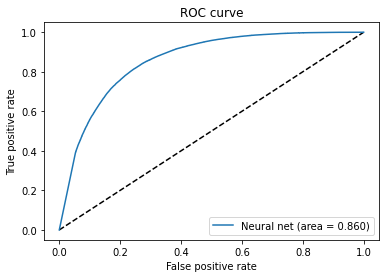

In [9]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_net, tpr_net, label='Neural net (area = {:.3f})'.format(auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('ROC_ANN.png', dpi=100)
